In [ ]:
# Kaushal Gurung

# Task 3: Model Training

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the Dataset
df = pd.read_csv("../data/BostonHousingClean.csv")

**To Choose appropriate features for the model, we should consider several factors:**
1. **Target Variable** is also known as the dependent variable or output variable. 
    - It is the variable that we aim to predict or explain in a machine learning or statistical model. 
    - It is the outcome we are interested in forecasting based on the input features (independent variables).
2. **Correlation with Target Variable**: Features that have a high correlation with the target variable are usually more relevant.
3. **Domain Knowledge**: Sometimes domain knowledge can help in selecting features that are known to be important.
    - Potentially Relevant Features: are those features in a dataset that have a strong, direct, and logical relationship with the target variable. These features significantly impact the outcome and can enhance the accuracy and performance of predictive model.
    - Less Relevant Features are those features in dataset tha might have a more indirect or context-dependent impact.

In [15]:
# Dimensiton of the DataFrame
df.shape

(490, 14)

In [16]:
# Display the first few rows of DataFrame
print(df.columns.tolist())

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


There are **14** attributes in the DataFrame('BostonHouseClean.Csv') where: 
1.	**crim** - per capita crime rate by town
2.	**zn** - proportion of residential land zoned for lots over 25,000 sq.ft.
3.	**indus** - proportion of non-retail business acres per town.
4.	**chas** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.	**nox** - nitric oxides concentration (parts per 10 million)
6.	**rm** - average number of rooms per dwelling
7.	**age** - proportion of owner-occupied units built prior to 1940
8.	**dis** - weighted distances to five Boston employment centres
9.	**rad** - index of accessibility to radial highways
10.	**tax** - full-value property-tax rate per $10,000
11.	**ptratio** - pupil-teacher ratio by town
12.	**b** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.	**lstat** - % lower status of the population
14.	**medv** - Median value of owner-occupied homes in $1000's

**Target Variable**
- If our goal is to predict housing prices or values, 'medv' typically represents the medaian value of owner-occupied homes in $1000s. In such case, 'medv' is the target variable because it is the primary outcome we are trying to predict based on other features.
**Domain Knowledge**
- Potentially Relevent Features:
    - 'rm' (average number of rooms per dwelling): Often a strong predictor of housing prices.
    - 'age' (proportion of owner-occupied units built prior to 1940): May have an affect on housing prices.
    - 'lstat' (percentage of lower status of the population): Could be a strong predictor as well.
    - Similarly, 'dis', 'nox', 'tax', 'ptratio'.
- Less Relevant Features:
    - 'chas' (Charle River Dummy variable): Depending on the dataset and context, this might be less relevant.
    - 'zn' (proportion of residential land zoned for lots over 25,000 sq.ft.): Relevance depends on the housing market specifics.
    - Similarly, 'crim', 'rad', 'b', 'indus'.
**Correlations with Target Variable**
- Calculate the correlation matrix of the DataFrame, which includes the correlation of each feature with the target variable 'medv'.
- Also, a heatmap can provide a visual representation of the correlations.

In [17]:
# Calculate Correlations between target 'medv' and other features
correlations =df.corr()['medv'].sort_values(ascending = False)
print(correlations)

medv       1.000000
rm         0.694877
age        0.551451
ptratio    0.536780
zn         0.461896
dis        0.437310
chas       0.078832
b         -0.301444
rad       -0.482713
nox       -0.559389
tax       -0.588089
crim      -0.603613
indus     -0.644299
lstat     -0.817761
Name: medv, dtype: float64


<Axes: >

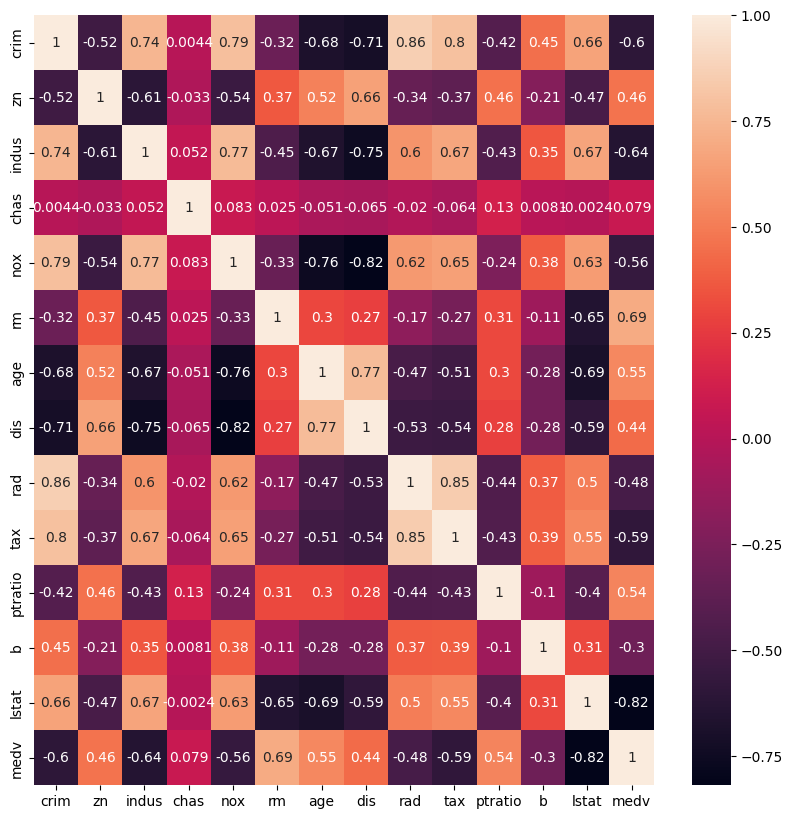

In [19]:
# Heatmap that displays the correlation between target 'medv' and other features 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

**Data Preparation**
- Seperate 'medv' from the feature variables to prepare data for modeling. Features are the variables used to make predictions, while 'medv' is the outcome of prediction.

In [34]:
# Splitting the Data:(Features and Target)
# X = df.drop(columns='medv') # Features except 'medv'(target)
X = df[['rm', 'age', 'lstat']] # only selected Features
y = df['medv'] # Target Variable

In [29]:
# Split data into the train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

This line of code splits the data into training and testing sets. \
This split allows you to train your model on X_train and y_train, and then evaluate its performance on the separate test set X_test and y_test. Here,
- 'train_test_split(X, y, test_size=0.2, random_state=42)':
    - X: Features (predictors).
    - y: Target variable.
    - test_size=0.2: Specifies that 20% of the data should be used for testing, while the remaining 80% is used for training.
    - random_state=42: Ensures the split is reproducible by setting a seed for random number generation.

The function returns four outputs:
- X_train: Features for training.
- X_test: Features for testing.
- y_train: Target values for training.
- y_test: Target values for testing.

In [35]:
# train the model
model = LinearRegression() # initiliaze the model
model.fit(X_train, y_train) # Train my model with the dataset for training

LinearRegression()

- Initialize the Model: model = LinearRegression() creates an instance of the LinearRegression class from Scikit-learn, but does not train it yet.
- Train the Model: 'model.fit(x_train, y_train)' trains the model using the training data ('X_train' and 'y_train').